# Linear Regression Model :   Weather Conditions in World War Two

# y= ax+b

y : target variable
x : predictor variable

# Introduction

The objective of this project is to investigate the relationship between daily minimum and maximum temperatures using a dataset
containing weather conditions recorded at various weather stations worldwide. Specifically, we aim to develop a linear regression model 
that can accurately predict the maximum temperature based on the minimum temperature. By analyzing the correlation between these two 
temperature variables, we seek to enhance our understanding of temperature dynamics and improve forecasting accuracy for daily 
maximum temperatures

In [ ]:
a = 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [99]:
df = pd.read_csv("C:/Users/trive/Desktop/vaanishka/Data Science/Summary of Weather.csv")
df.head()

C:\Users\trive\AppData\Local\Temp\ipykernel_12256\2110413887.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/trive/Desktop/vaanishka/Data Science/Summary of Weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [101]:
x=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [102]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [103]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

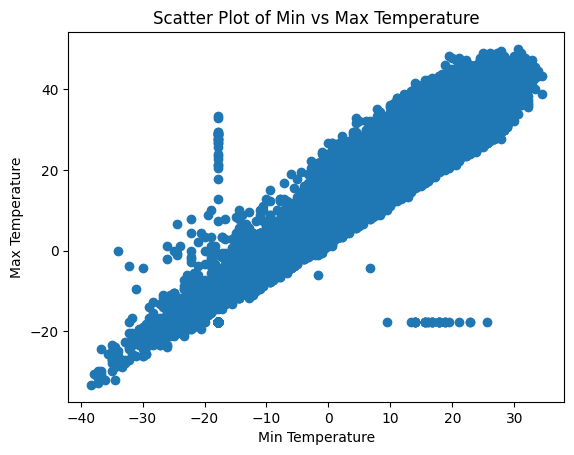

In [104]:
plt.scatter(x,y)
plt.xlabel("Min Temperature")
plt.ylabel("Max Temperature")
plt.title("Scatter Plot of Min vs Max Temperature")
plt.show()

In [105]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
x_train

array([[25.        ],
       [22.77777778],
       [23.88888889],
       ...,
       [22.77777778],
       [ 1.11111111],
       [19.44444444]])

In [106]:
y_test

array([[33.33333333],
       [32.77777778],
       [28.88888889],
       ...,
       [20.        ],
       [16.66666667],
       [35.55555556]])

In [107]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [108]:
y_pred= model.predict(x_test)
y_pred

array([[30.09198941],
       [31.62431308],
       [33.15663674],
       ...,
       [19.36572375],
       [13.74720364],
       [26.51656752]])

In [109]:
model.coef_

array([[0.9193942]])

In [110]:
model.intercept_

array([10.68255631])

# prediction of test data

predicted maxtemp output= intercept +coef_(min temps)
y_pred_test =10.68255631 + 0.9193942(X_test)

In [111]:
df2=pd.DataFrame({"Actual":y_test.flatten(), "Prediction":y_pred.flatten()})
df2

,Actual,Prediction
0,33.333333,30.091989
1,32.777778,31.624313
2,28.888889,33.156637
3,32.222222,30.091989
4,25.000000,27.538117
...,...,...
23803,28.888889,33.156637
23804,30.555556,31.624313
23805,20.000000,19.365724
23806,16.666667,13.747204


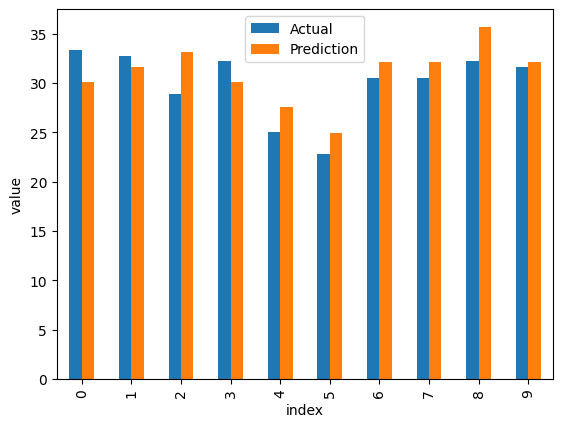

In [112]:
df3=df2.head(10).copy()
df3.plot(kind='bar')
plt.xlabel('index')
plt.ylabel("value")
plt.show()

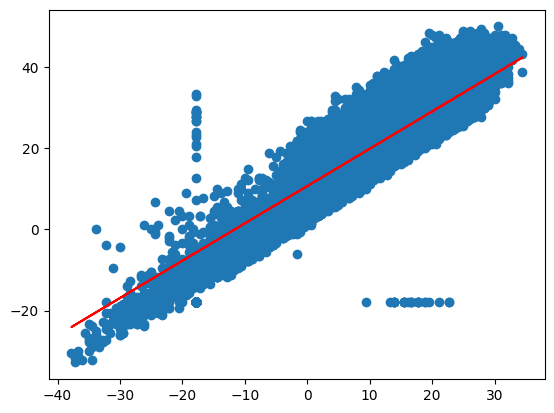

In [113]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

In [114]:
model.score(x,y)

0.7715572935332679

# Accepting Input To Make Predictions

In [87]:
def predict():
    user_input = input("Enter a value for X: ")
    try:
        value = float(user_input)  # Convert input to float
        prediction = model.predict(np.array([[value]]))  # Make prediction
        print(f"The predicted value for Y is: {prediction[0]}")  # Display prediction
    except ValueError:
        print("Please enter a valid number.")

# Call the function
predict()

Enter a value for X:  23.04


The predicted value for Y is: [31.86752244]
